In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Loading and exploring the data

In [4]:
# reads and store CSV file as a dataframe
df = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')

In [5]:
df.describe(include='all')

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
count,1433.000000,1146,1146.000000,263.000000,1146,1013,1146,1146,1146,1146,...,1433,1433,1433.000000,1430,1433,840,1433,851,1433,1433
unique,NaN,6,NaN,NaN,4,3,3,3,3,6,...,5,5,NaN,70,53,47,53,48,264,3
top,NaN,26-100,NaN,NaN,Yes,No,No,No,I don't know,Somewhat easy,...,Not applicable to me,Often,NaN,Male,United States of America,California,United States of America,California,Back-end Developer,Sometimes
freq,NaN,292,NaN,NaN,531,354,813,531,742,281,...,557,538,NaN,610,840,130,851,141,263,757
mean,0.200279,NaN,0.770506,0.942966,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,34.286113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.400349,NaN,0.420691,0.232350,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11.290931,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Show dimension of the dataframe
df.shape

(1433, 63)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

In [8]:
(df['Do you work remotely?'].isnull().sum() / 1433 ) *100

0.0

In [9]:
df[('What country do you work in?')].value_counts()

What country do you work in?
United States of America    851
United Kingdom              183
Canada                       74
Germany                      58
Netherlands                  47
Australia                    34
Sweden                       20
Ireland                      15
France                       14
Switzerland                  10
Brazil                       10
India                         9
Russia                        9
New Zealand                   9
Denmark                       7
Bulgaria                      7
Finland                       7
Belgium                       5
South Africa                  4
Poland                        4
Austria                       4
Czech Republic                3
Italy                         3
Chile                         3
Norway                        3
Romania                       3
Spain                         3
Other                         2
Bosnia and Herzegovina        2
Afghanistan                   2
Pakistan   

# Preprocessing of the data

* Drop Columns With Missing Value > 50 % and have non-standardized inputs
* Changing Categorical responses using Linear Ordinal Encoding ( 0 - 1 )
* Dimensionality Reduction with Factorial Analysis of Mixed Data


### 1. Calculate and store columns with missing values count greater than 49 %

In [10]:
# Store all columns names
columns = df.columns

In [11]:
# initiate an array to store columns to drop
columns_to_drop = []
# for loop to check all columns
for i in range(len(columns)):
    # calculate percentage of missing values in column at index i
    percentage = (df[columns[i]].isnull().sum() / 1433) * 100
    # check if percentage greater than 49
    if percentage > 49 :
        # store in the column in columns_to_drop
        columns_to_drop.append(columns[i])
# Output number of columns to drop
print(len(columns_to_drop))

13


### 2. Add columns with open ended questions

- This is done manually, use: df[column_name].value_counts()
- Check if the categorical inputs can be turned into numerical equivalence
- If it can not, add it to the columns_to_drop

In [12]:
# store all remaining columns in columns
columns = df.columns
# loop through columns and print each column with its unique inputs
for i in range(len(columns)):
    print('---------------------------------------------------------')
    print(df[columns[i]].value_counts())

---------------------------------------------------------
Are you self-employed?
0    1146
1     287
Name: count, dtype: int64
---------------------------------------------------------
How many employees does your company or organization have?
26-100            292
More than 1000    256
100-500           248
6-25              210
500-1000           80
1-5                60
Name: count, dtype: int64
---------------------------------------------------------
Is your employer primarily a tech company/organization?
1.0    883
0.0    263
Name: count, dtype: int64
---------------------------------------------------------
Is your primary role within your company related to tech/IT?
1.0    248
0.0     15
Name: count, dtype: int64
---------------------------------------------------------
Does your employer provide mental health benefits as part of healthcare coverage?
Yes                                531
I don't know                       319
No                                 213
Not eligible

In [13]:
# Store the columns with inputs that can not be easily weighted
open_ended_columns = ['What US state or territory do you work in?','What country do you work in?','What US state or territory do you live in?','What country do you live in?','Why or why not?.1','Why or why not?']

### 3. Dropping columns in open_ended_columns and columns_to_drop

In [14]:
# Dropping columns in open_ended_columns
df_new = df.drop(columns=open_ended_columns, axis = 1)
# Dropping columns in columns_to_drop
df_new = df_new.drop(columns=columns_to_drop, axis = 1)

In [15]:
# Show new shape of the dataframe
df_new.shape 

(1433, 44)

In [16]:
# check the number of rows with missing 
df_new.isnull().any(axis = 1).sum() / 1433

0.3991625959525471

In [17]:
# drop all rows with null values
df_new = df_new.dropna()

In [18]:
# check the number of rows with missing values
df_new.isnull().any(axis= 1).sum()

0

In [19]:
# show new shape
df_new.shape

(861, 44)

## 4. Changing Categorical Data to numeric

### Categorizing using map

#### Change gender into numeric values

In [20]:
# Clean up potential hidden spaces first 
df_new['What is your gender?'] = df_new['What is your gender?'].str.strip()

# change all male inputs to 1
df_new['What is your gender?'] = df_new['What is your gender?'].replace(['M','m','male','Male','Male (cis)','cis man','cis male','Cis Male','cisdude','Sex is male','Man','man','Cis male','Male.'],'Male')

# change all female inputs to 0
df_new['What is your gender?'] = df_new['What is your gender?'].replace(['Female','F','f','female','Woman','woman','fem','Cis-woman','Female (props for making this a freeform field, though)','I identify as female.','fm','Cis female ','Genderfluid (born female)','Female or Multi-Gender Femme','female/woman','Cisgender Female','Cis female','Female assigned at birth'],'Female')

# change all other inputs to 0.5
df_new['What is your gender?'] = df_new['What is your gender?'].replace(['non-binary','Male/genderqueer','Genderfluid','Human','Enby','mail','Genderflux demi-girl','genderqueer','Genderqueer','none of your business','Transitioned, M2F','Androgynous','Other','nb masculine','Transgender woman'],'Other')

In [21]:
# display all unique values in the gender column
df_new['What is your gender?'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [22]:
df_new['What is your gender?'].value_counts()

What is your gender?
Male      631
Female    214
Other      16
Name: count, dtype: int64

#### Changing work positions into numerical categories

In [23]:
# changing work position to numeric values
def classify_position(x):
    tech_keywords = ['Developer', 'DevOps', 'SysAdmin', 'Support', 'Evangelist', 'Designer']
    
    # Check if word has Leadership or Supervisor in it
    if 'Leadership' in x or 'Supervisor' in x:
        return 1.0

    # Check for the main tech keywords
    elif any(word in x for word in tech_keywords):
        return 0.5
    
    # Independent/Other
    else:
        return 0.0

# Apply to the column work position
df_new['Which of the following best describes your work position?'] = df_new['Which of the following best describes your work position?'].apply(classify_position)

In [24]:
# check all unique enters of work position
df_new['Which of the following best describes your work position?'].unique()

array([0.5, 1. , 0. ])

#### Cleaning the age column

- remove all ages above 80 and below 15



In [25]:
# removing all ages above 80 and below 15
df_new = df_new[(df_new['What is your age?'] <= 80) & (df_new['What is your age?'] >= 15)]

# print max and min age
print("Min:",df_new['What is your age?'].min(),'Max:',df_new['What is your age?'].max())

Min: 19 Max: 74


#### Changing all remaining text categorical data to numeric

In [26]:
# Create a mapping for all inputs
mapping = {"I don't know":0.5,"Some of them":0.5,"Yes, all of them":1,"None of them":0,"Some of my previous employers":0.5,"No, at none of my previous employers":0,"Yes, at all of my previous employers":1,"Yes":1,"No":0,"Not eligible for coverage / N/A":0,"I am not sure":0.5,"Somewhat difficult":0.25,"Very difficult":0,"Neither easy nor difficult":0.5,"Somewhat easy":0.75,"Very easy":1,"Maybe":0.5,"No, none did":0,"Yes, they all did":1,"Some did":0.5,"I was aware of some":0.5,"Yes, I was aware of all of them":1,"No, I only became aware later":0,"N/A (not currently aware)":0,"None did":0,"Yes, I think it would":0.25,"No, I don't think it would":0.75,"Yes, they do":0,"Yes, I think they would":0.25,"No, I don't think they would":0.75,"No, they do not":1,"Very open":1,"Somewhat open":0.75,"Neutral":0.5,"Not applicable to me (I do not have a mental illness)":0.5,"Somewhat not open":0.25,"Not open at all":0,"Maybe/Not sure":0.5,"Yes, I observed":1,"Yes, I experienced":1,"Never":0,"Not applicable to me":0,"Rarely":0.33,"Sometimes":0.5,"Often":1,"1-5":0.17,"6-25":0.33,"26-100":0.5,"100-500":0.67,"500-1000":0.83,"More than 1000":1,"Yes, always":1,"Always":1,"Other":0.5,"Male":1,"Female":0,"No, it has not":1,"Yes, it has":0}

In [27]:
# store all non numeric columns
columns = df_new.select_dtypes(exclude='number').columns

In [28]:
len(columns)

38

In [29]:
# use a for loop to change the categories to numeric values
for i in range(len(columns)):
    df_new[columns[i]] = df_new[columns[i]].map(mapping)
# display the dataframe
df_new.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,...,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,Which of the following best describes your work position?,Do you work remotely?
1,0,0.33,1.0,0.0,1.0,1.0,1.0,1.0,0.75,0.0,...,1.0,1.0,1.0,1,0.33,0.5,29,1.0,0.5,0.0
4,0,0.33,0.0,1.0,1.0,0.0,0.0,0.0,0.50,1.0,...,1.0,1.0,1.0,1,0.50,0.5,43,0.0,1.0,0.5
5,0,1.00,1.0,1.0,0.5,0.0,1.0,1.0,0.75,1.0,...,0.0,1.0,0.0,1,0.00,1.0,42,1.0,0.5,0.5
6,0,0.50,1.0,0.5,0.0,0.0,0.0,0.5,0.75,0.0,...,0.0,0.0,0.0,0,0.00,0.0,30,1.0,0.5,0.5
7,0,1.00,1.0,1.0,1.0,0.0,1.0,1.0,1.00,0.0,...,1.0,1.0,1.0,1,0.50,1.0,37,0.0,0.5,1.0


In [30]:
# check of non-numeric columns
print(df_new.select_dtypes(exclude='number').columns)

Index([], dtype='object')


In [31]:
df['Does your employer provide mental health benefits as part of healthcare coverage?'].unique()

array(['Not eligible for coverage / N/A', 'No', nan, 'Yes',
       "I don't know"], dtype=object)

In [32]:
df_new.isnull().any(axis=0)

Are you self-employed?                                                                                                                            False
How many employees does your company or organization have?                                                                                        False
Is your employer primarily a tech company/organization?                                                                                           False
Does your employer provide mental health benefits as part of healthcare coverage?                                                                 False
Do you know the options for mental health care available under your employer-provided coverage?                                                   False
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?            False
Does your employer offer resources to learn more about mental health concerns and option

### 5. Standardising the data
- Use StandardScaler: ensure no column ways more than the other columns
- This is calculated by z =  (x - mean)/ standard deviation

In [33]:
from sklearn.preprocessing import StandardScaler


In [34]:
scaler = StandardScaler()

In [35]:
df_final_scaled = scaler.fit_transform(df_new)

In [36]:
# Fill any missed values with 0.5 (Neutral) so the model doesn't crash
df_new = df_new.fillna(0.5)

# PCA Dimension Reduction

In [37]:
# Check for any null values
df_new.isnull().any(axis=0).sum()

0

In [38]:
# Perform PCA reduction
from sklearn.decomposition import PCA

# create components holding 50% of the most information
pca = PCA(n_components=8)

# fit the data
pca_data = pca.fit_transform(df_final_scaled) 

# Check how much information we kept
print(f"Total Variance Explained: {pca.explained_variance_ratio_.sum() * 100:.2f}%")

Total Variance Explained: 51.51%


In [39]:
# shape of the dimensional reduced dataframe
pca_data.shape

(858, 8)

In [40]:
pca.components_.T

array([[-0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [ 2.50763920e-02,  4.16887032e-02,  1.28778473e-01,
         2.57691690e-01, -2.64864868e-01, -2.92464004e-01,
         1.54211438e-01, -3.91668606e-02],
       [-1.89987502e-02,  4.57585579e-02, -4.72702345e-02,
        -1.55946643e-01,  2.38431760e-01,  4.18297991e-01,
         2.56762370e-02, -5.30854166e-03],
       [-2.09191294e-02,  1.91394935e-01,  1.52849771e-01,
         2.70960340e-01, -1.29129443e-01,  9.81714486e-02,
         4.93283397e-02,  1.65465036e-01],
       [ 1.90344803e-02,  2.38949340e-01,  3.95876025e-02,
         1.61108285e-01, -9.17039915e-02,  1.49840888e-02,
        -2.16476976e-02,  1.46620708e-01],
       [-6.87221261e-02,  1.04906734e-01,  1.36938244e-02,
         3.44903421e-01, -3.41316311e-02, -2.21258639e-01,
        -1.23172510e-01, -2.02128621e-01],
       [-5.39746456e-02,  1.315483

# Apply KMean algorithm to the data

### Finding the number of clusters to use using Elbow curve method

In [41]:
from sklearn.cluster import KMeans

# function that create the elbow curve 
def optimal_k_cluster(data,n_clusters):
    mean = []
    inertais = []
    
    for i in range(1,n_clusters+1):
        # training the algorthm with K clusters
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
        kmeans.fit(data)
        
        # storing the cluster and it's corresponding inertia
        mean.append(i)
        inertais.append(kmeans.inertia_)

    #Generating the Elbow Graph
    fig  = plt.subplots(figsize = (10,5))
    plt.plot(mean,inertais,'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('K-means Elbow Curve')
    plt.grid(True)
    plt.show()
        

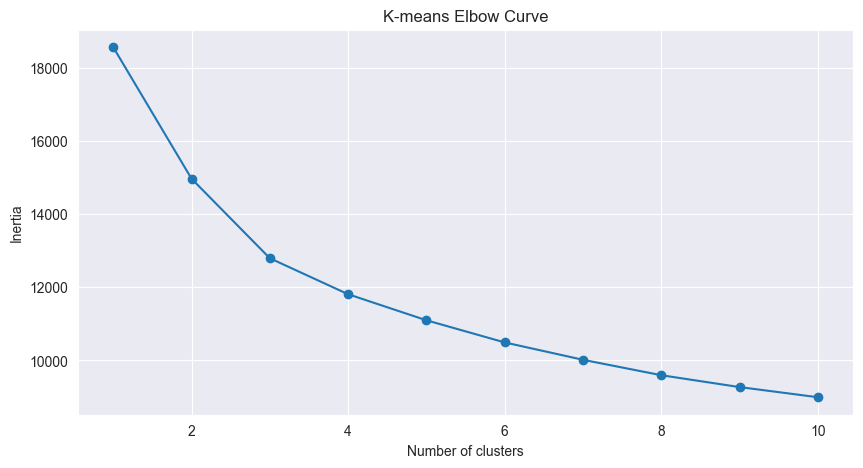

In [42]:
# call the function and generate the elbow curve
optimal_k_cluster(pca_data,10)

In [43]:


# Run K-Means on the 22-dimensional PCA data and create 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(pca_data)

# Calculate Silhouette Score to see if 22 dimensions helped or hurt the algorithm
from sklearn.metrics import silhouette_score
score = silhouette_score(pca_data, clusters)
print(f"Silhouette Score with 3 components: {score:.3f}")

Silhouette Score with 3 components: 0.175


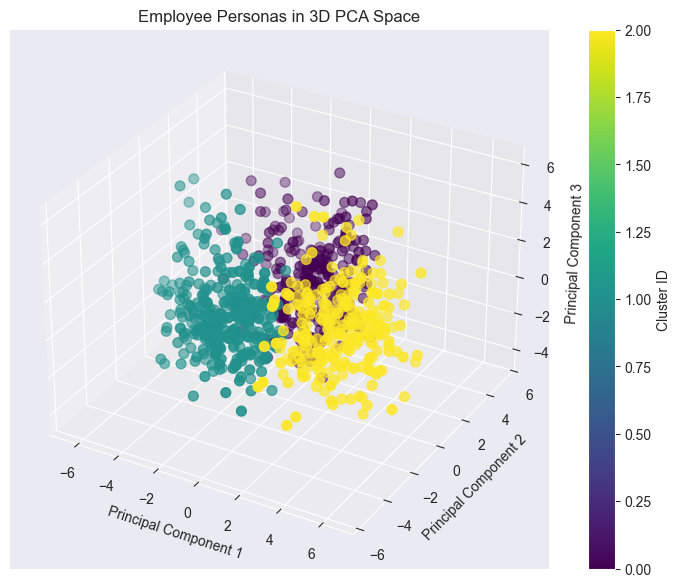

In [44]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the 3 PCA components
scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], 
                     c=clusters, cmap='viridis', s=50)

ax.set_title('Employee Personas in 3D PCA Space')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(scatter, label='Cluster ID')
plt.show()

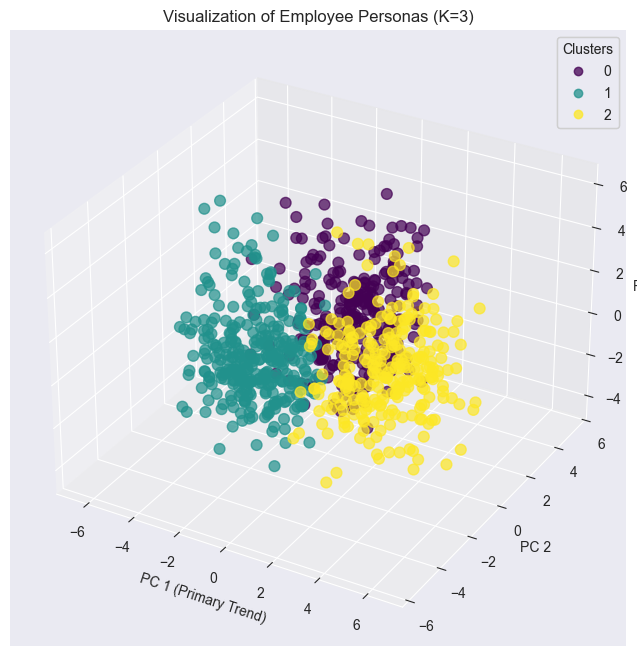

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the first 3 PCA components
# c=cluster_labels assigns a color to each of your 3 groups
scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], 
                     c=clusters, cmap='viridis', s=60, alpha=0.7)

ax.set_title('Visualization of Employee Personas (K=3)')
ax.set_xlabel('PC 1 (Primary Trend)')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

# Add a legend to show which color is which cluster
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

# Visualizing the inputs

In [46]:
df_new['Cluster_ID'] = clusters

In [53]:
# 1. Group by your new clusters and calculate the mean for every question
cluster_summary = df_new.groupby('Cluster_ID').mean()

#
cluster_summary.drop(columns=['What is your age?'], inplace=True)

# 2. Calculate the 'Spread' (Difference between Max and Min mean for each question)
# High spread means this question is a "Leverage Point" that defines the clusters.
spread = cluster_summary.max() - cluster_summary.min()
top_insights = spread.sort_values(ascending=False).head(15)

print("--- Top 15 Questions that Define the Clusters ---")
print(top_insights)

--- Top 15 Questions that Define the Clusters ---
Have you ever sought treatment for a mental health issue from a mental health professional?                                                   0.829585
Have you been diagnosed with a mental health condition by a medical professional?                                                             0.824505
Have you had a mental health disorder in the past?                                                                                            0.734441
Do you currently have a mental health disorder?                                                                                               0.641438
If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?                          0.626819
Do you think that discussing a mental health disorder with your employer would have negative consequences?                                    0.523390
Would you feel comfortable discussing a ment

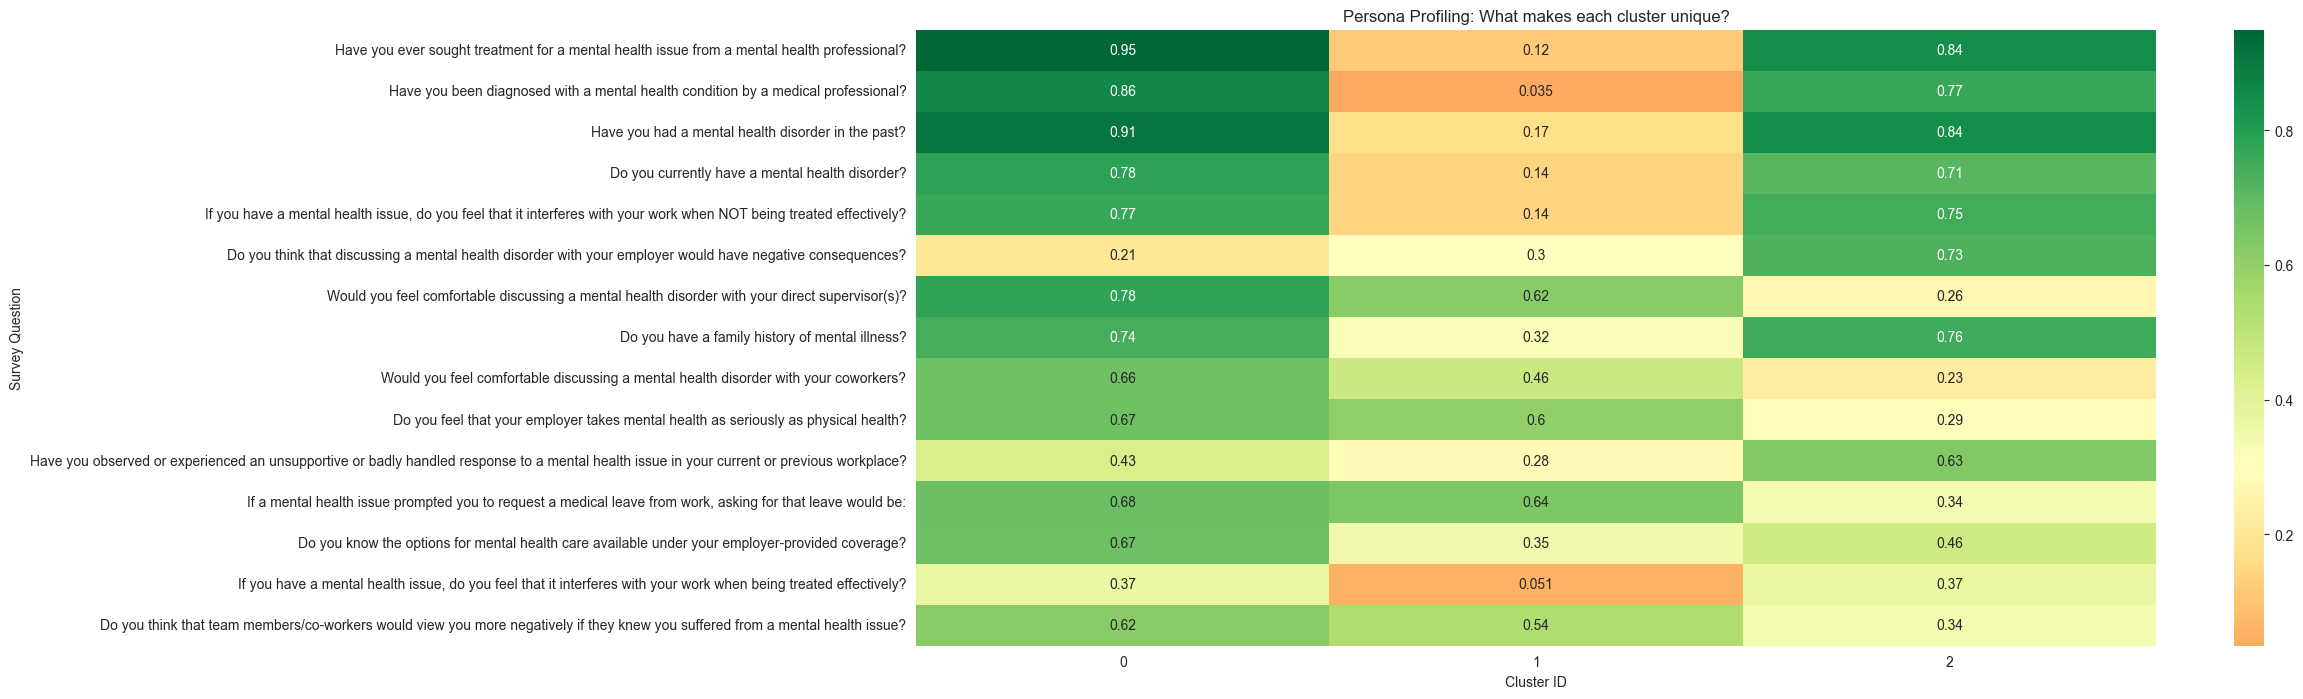

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the top 15 defining questions
plt.figure(figsize=(20, 8))

sns.heatmap(cluster_summary[top_insights.index].T, annot=True, cmap='RdYlGn', center=0.3)


plt.title('Persona Profiling: What makes each cluster unique?')
plt.xlabel('Cluster ID')
plt.ylabel('Survey Question')
plt.savefig('persona_profiling2.png')
plt.show()